In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dsp/dongmei/suppression'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_clean.csv', DATA))
head(data)

X  lon       lat      etopo1    beetleAcres host forest mStdAge   density 
1  1 -124.2879 40.21671 201.27065 0.0         0    0      150.50000 27214.52
2  3 -124.3199 40.39468 323.83456 0.0         0    0       10.00000 48738.07
3  6 -124.1555 40.14040 296.74728 0.0         1    1       61.81890 50787.85
4  9 -124.2030 40.40744 509.94406 0.0         0    0       81.91204 56792.91
5 11 -124.2350 40.58543  50.54948 0.0         0    0       92.50000 13976.98
6 19 -124.1177 40.59810 204.08624 0.8         0    1       35.00000 50636.57
  PctLarge  ⋯ JanMin    TOctSep   Jan20 PcumOctSep SprsCPA   SprsFires PctSprs
1 0.8361742 ⋯ 1.3934664 10.444805 0     3704.248   4583.3333 0         0.0    
2 0.7272727 ⋯ 1.2732506 10.410985 0     3577.369      0.0000 0         0.0    
3 0.5588235 ⋯ 0.8641355 10.394995 0     3554.745   1362.4307 3         1.0    
4 0.0000000 ⋯ 0.3563742  8.816735 0     3659.275      0.0000 0         0.0    
5 1.0000000 ⋯ 0.9581322 11.532807 0     2978.287      0.0000 1         1.0    
6 0.8571429 ⋯ 0.4126522 11.503209 0     2952.419    538.4615 1         0.5    
  SprsAcre SprsDays OutDays
1    0.0    0        0     
2    0.0    0        0     
3 5762.0   12       84     
4    0.0    0        0     
5    5.0    0        0     
6    0.1    2        7

In [3]:
data <- data[, -1]
data <- subset(data, beetleAcres > 0)
head(data)

lon       lat      etopo1    beetleAcres host forest mStdAge  density 
6  -124.1177 40.59810 204.08624  0.80000    0    1      35.00000 50636.57
13 -124.2107 41.76738  13.40179  1.15500    1    0      85.00000 12070.25
22 -124.2419 42.58036 413.76248 16.93333    1    0      53.33544 57387.75
28 -123.6742 40.10080 666.33838  0.80000    1    0      47.12732 29547.89
30 -123.8913 41.34770 354.79434  0.46000    1    0      62.10340 52603.24
31 -124.0045 41.97059 546.72034 20.20000    1    0      71.42152 45178.30
   PctLarge  PctOld     ⋯ JanMin     TOctSep   Jan20 PcumOctSep SprsCPA 
6  0.8571429 0.00000000 ⋯  0.4126522 11.503209 0     2952.419   538.4615
13 1.0000000 0.60000000 ⋯  0.2656326 12.054506 0     3310.627     0.0000
22 0.6666667 0.00000000 ⋯ -1.0239711 11.366515 0     3117.234     0.0000
28 0.6666667 0.33333333 ⋯ -1.8719690  9.471522 0     3076.261     0.0000
30 0.4418605 0.01282051 ⋯ -1.7491565 11.032777 0     2947.334     0.0000
31 0.3642857 0.21111111 ⋯ -1.7483980 11.120636 0     3071.409     0.0000
   SprsFires PctSprs SprsAcre SprsDays OutDays
6  1         0.5     0.100000 2.0      7      
13 0         0.0     0.000000 0.0      0      
22 0         0.0     0.000000 0.0      0      
28 0         0.0     0.000000 0.0      0      
30 6         1.0     1.433333 0.5      1      
31 0         0.0     0.000000 0.0      0

In [4]:
dim(data)

[1] 4605   58

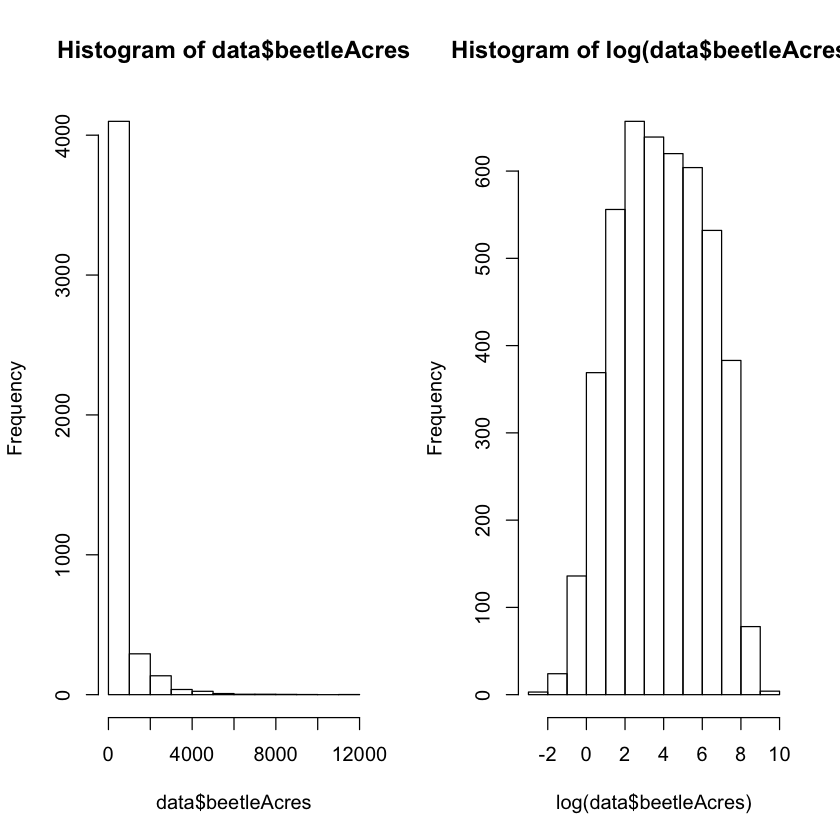

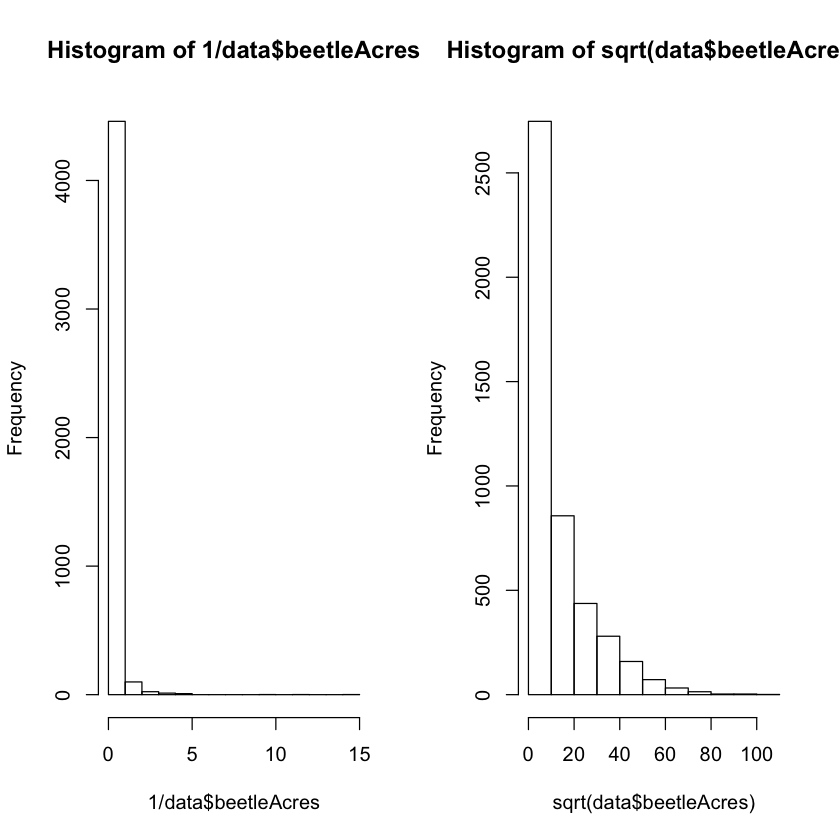

In [5]:
par(mfrow=c(1, 2))
hist(data$beetleAcres)
hist(log(data$beetleAcres))
hist(1 / data$beetleAcres)
hist(sqrt(data$beetleAcres))

In [6]:
summary(data$SprsCPA)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      0.0    970.7     36.5 492000.0 

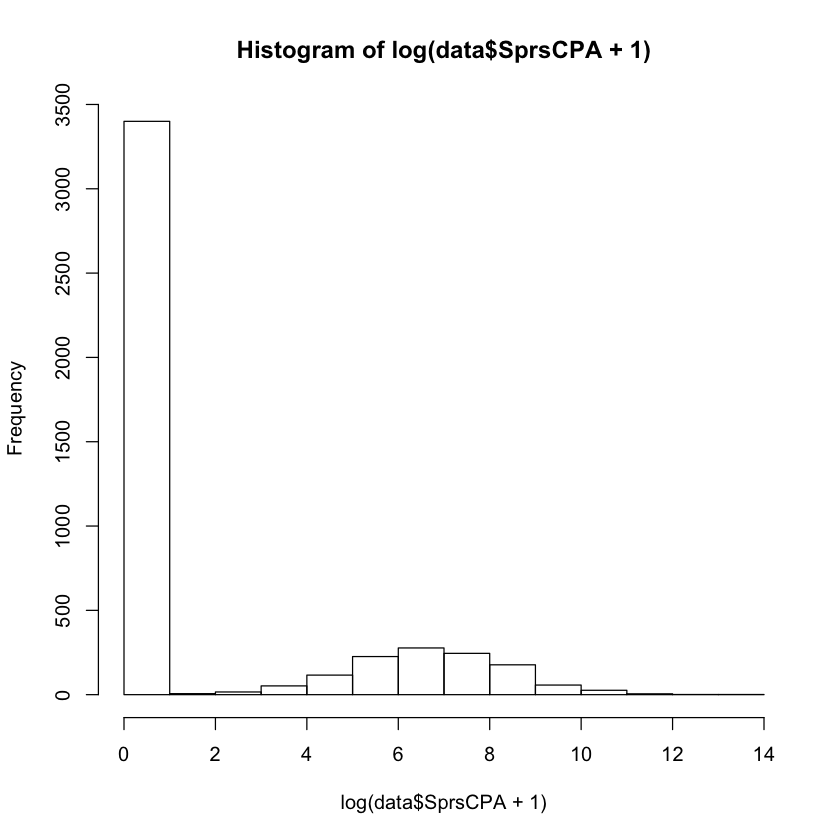

In [7]:
hist(log(data$SprsCPA + 1))

In [8]:
data$SprsCPA <- log(data$SprsCPA + 1)
names(data)[which(names(data) == 'SprsCPA')] <- 'logSprsCPA.p1'

In [9]:
for (field in names(data)) {
  if (field != 'beetleAcres') {
    cat(sprintf('te(%s) + ', field))   
  }
}

te(lon) + te(lat) + te(etopo1) + te(host) + te(forest) + te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + te(pls) + te(GAP1) + te(GAP2) + te(GAP3) + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays) + 

For the model below--
Began with all variables included with `te()` smoothing for all except the binary variables (`forest, host, GAP*`)

For each iteration:
* Find the variable with the largest p value
* If the p value > 0.05 then:
  * If the value is smoothed, convert to simple linear term (no `te()`)
  * If the value is a simple linear term, omit from the model
* Continue as long as the GCV value continues to decrease
* IF GCV increases, attempt simplification or removal of the variable with the next-largest p value

In [97]:
mod <- gam(
  log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + te(mStdAge)
    + te(density) + te(PctLarge) + PctOld + te(vcc) + te(mfri) 
    + te(prs) + GAP1 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) 
    + te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) 
    + te(AugMaxT) + te(Acs) + te(MarMin) + te(ddAugJul) + te(JanTmin) 
    + te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) 
    + te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) 
    + te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) 
    + te(PcumOctSep) + te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) 
    + SprsAcre + te(SprsDays) + te(OutDays),
  data=data) # GCV: 2.4082

In [98]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + te(mStdAge) + 
    te(density) + te(PctLarge) + PctOld + te(vcc) + te(mfri) + 
    te(prs) + GAP1 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + 
    te(AugMaxT) + te(Acs) + te(MarMin) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + 
    te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + 
    te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + 
    te(PcumOctSep) + te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) + 
    SprsAcre + te(SprsDays) + te(OutDays)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.569e+00  8.351e-02  42.735  < 2e-16 ***
host         3.672e-01  8.198e-02   4.479 7.69e-06 ***
PctOld       1.669e-01  9.396e-02   1.777 0.075685 .  
GAP1        -3

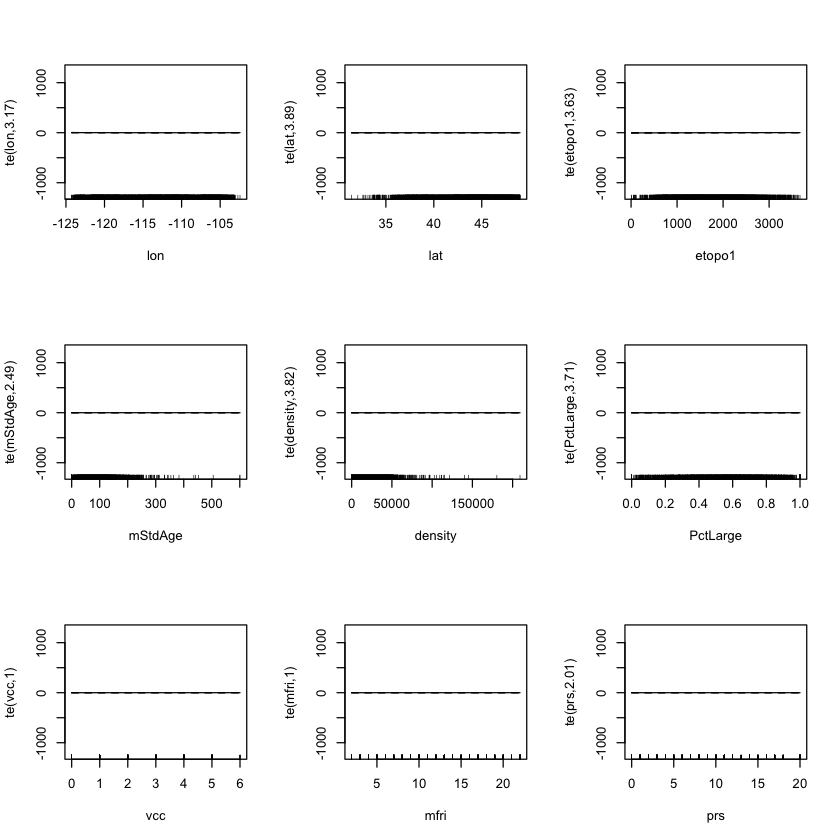

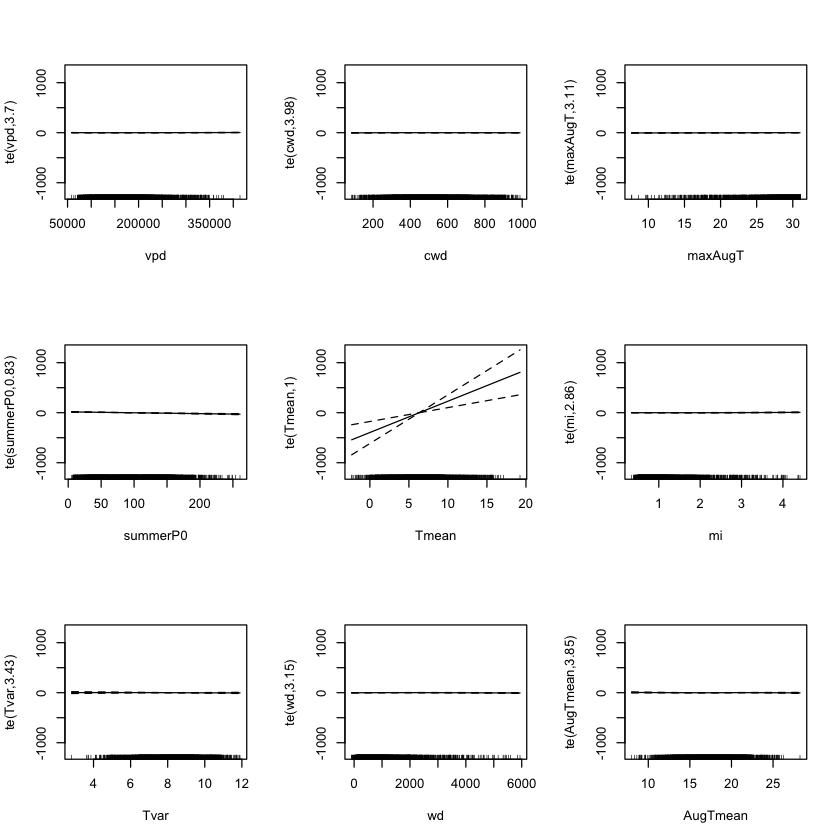

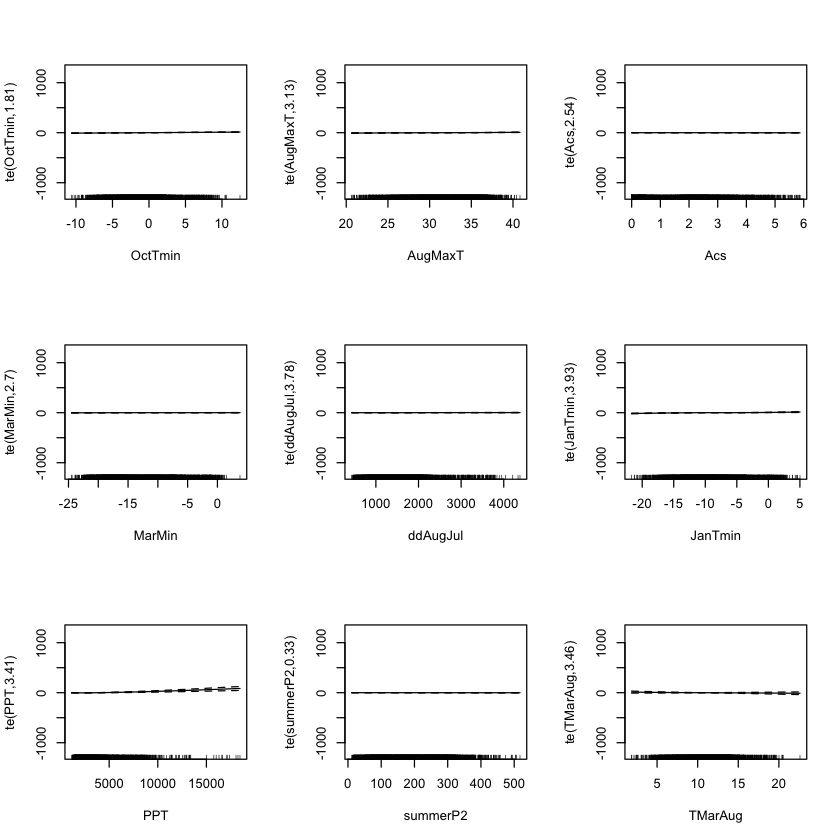

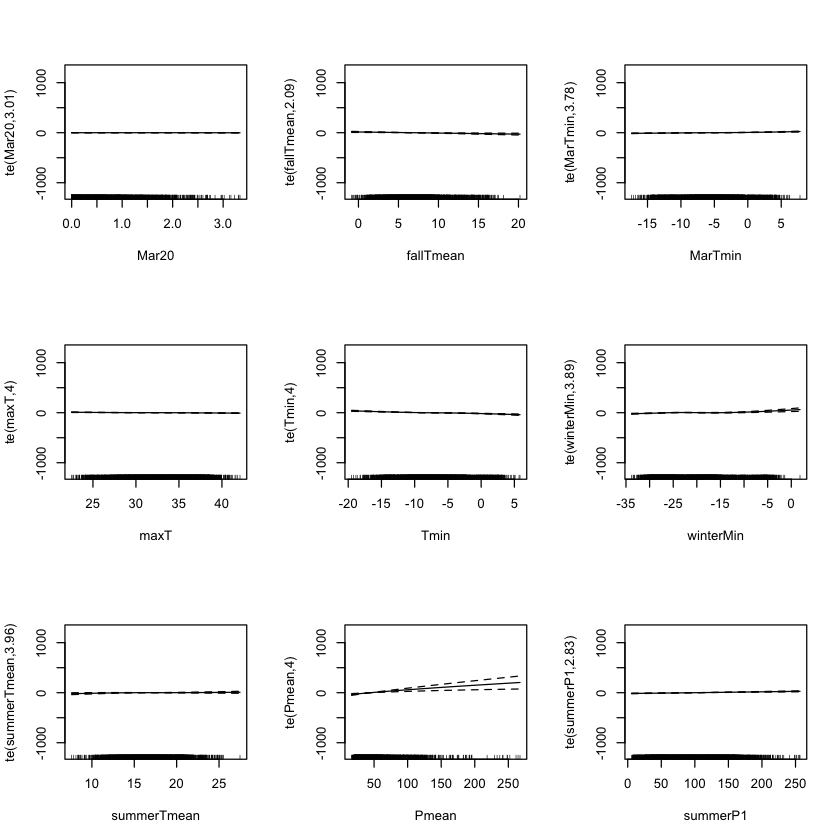

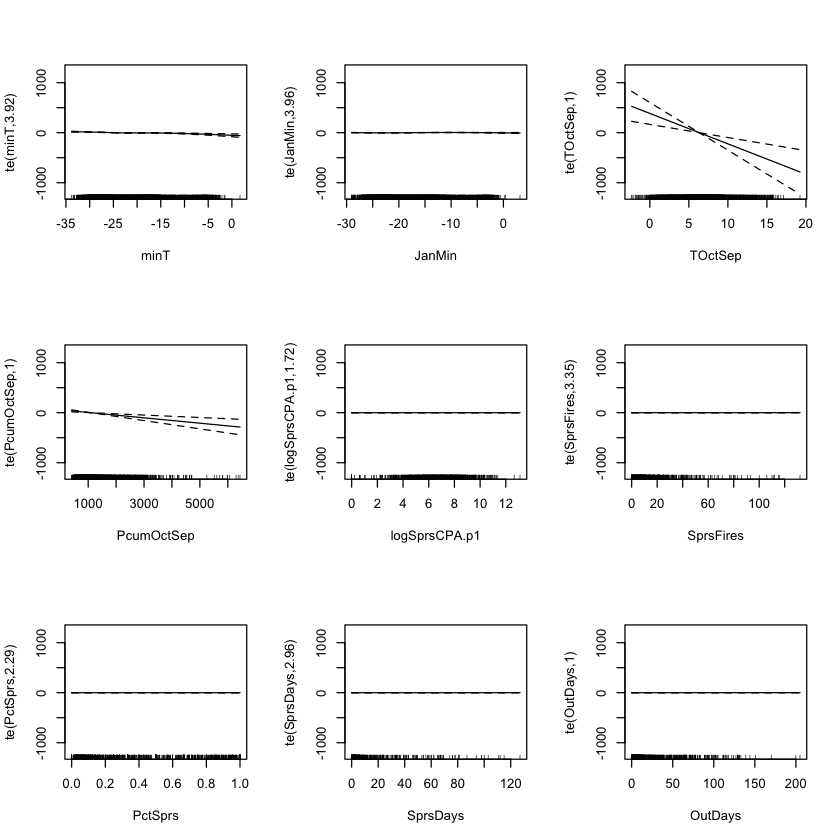

In [99]:
par(mfrow=c(3, 3))
plot(mod)

In [102]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'PctLarge', 'vcc', 'mfri',
  'prs', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 'Tvar', 'wd',
  'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJul', 'JanTmin',
  'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 'MarTmin', 'maxT', 
  'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'PcumOctSep', 'logSprsCPA.p1', 'SprsFires', 
  'PctSprs', 'SprsDays', 'OutDays')

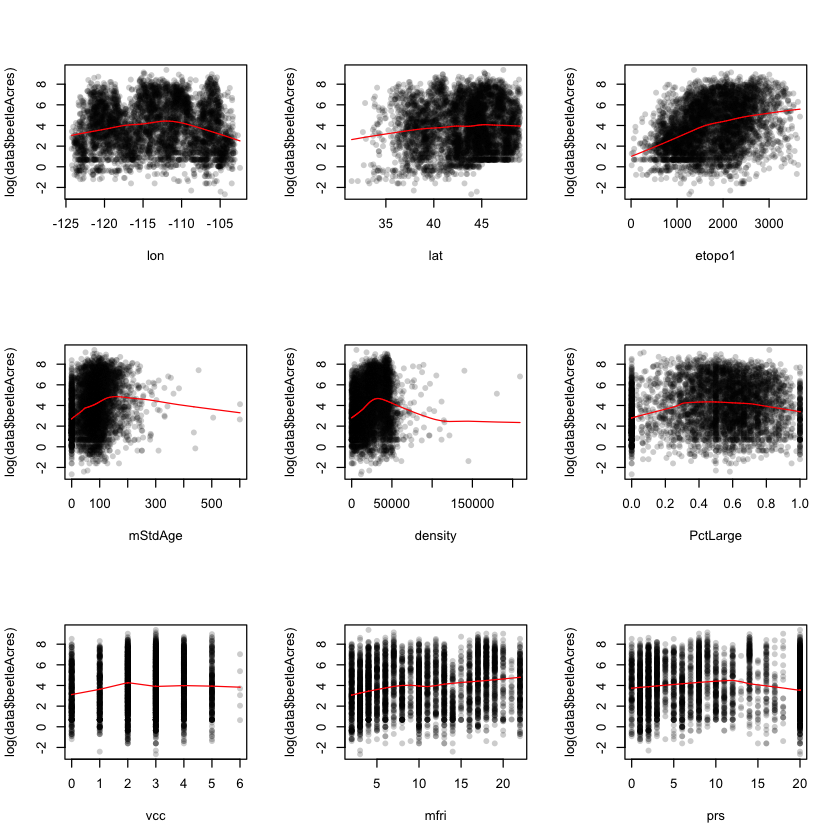

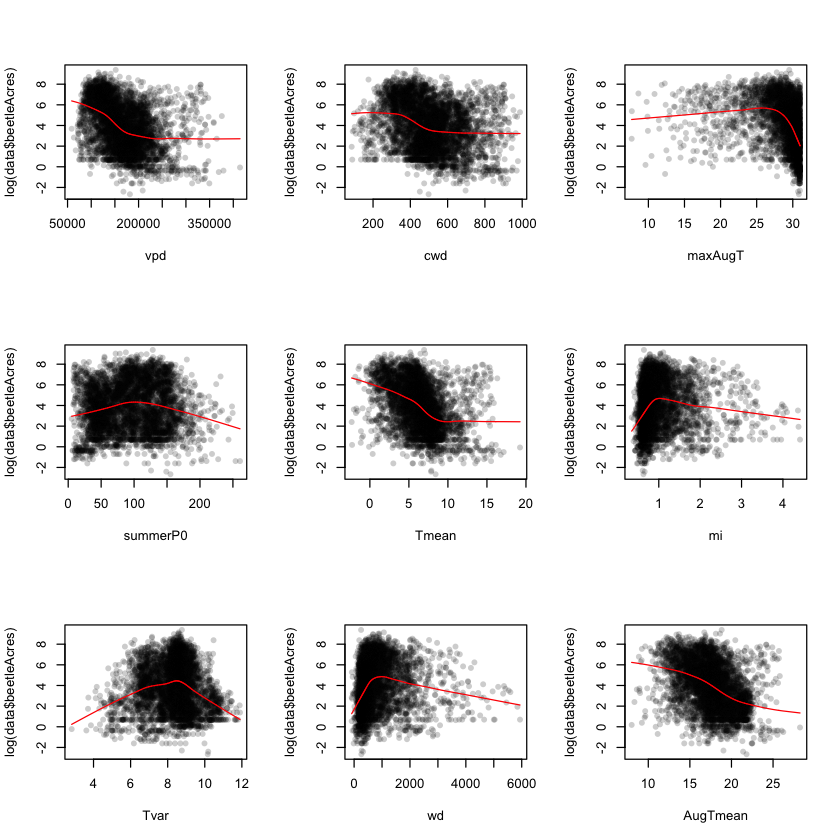

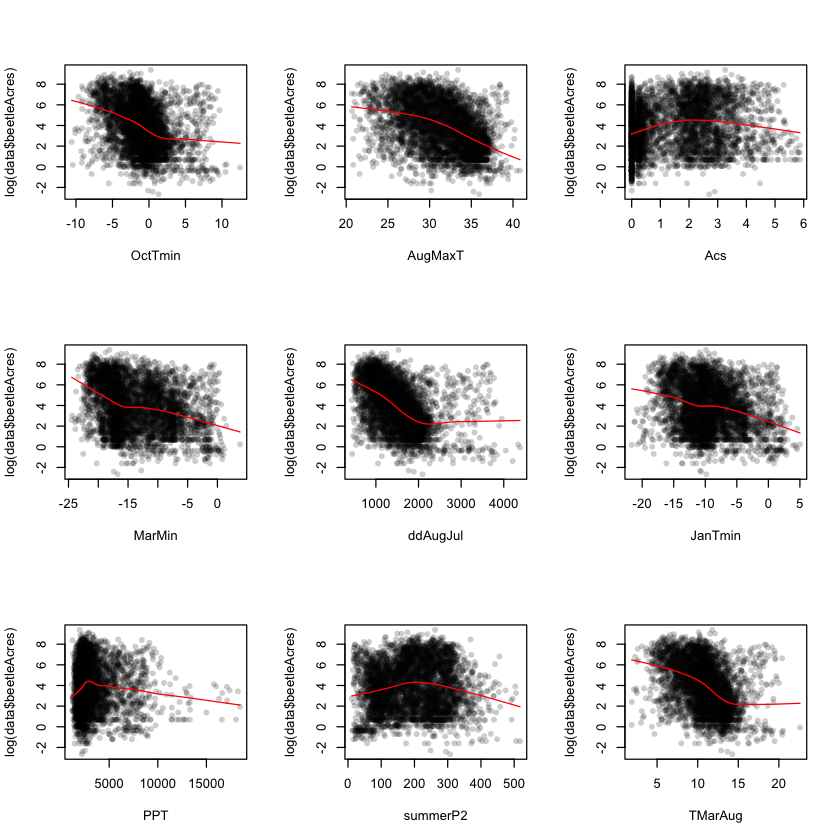

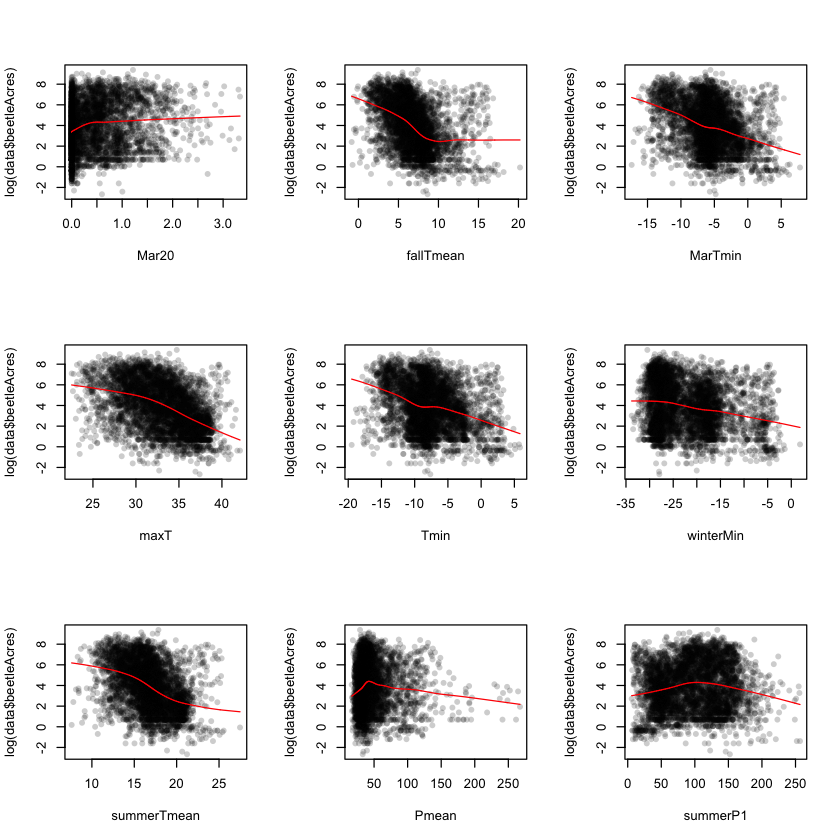

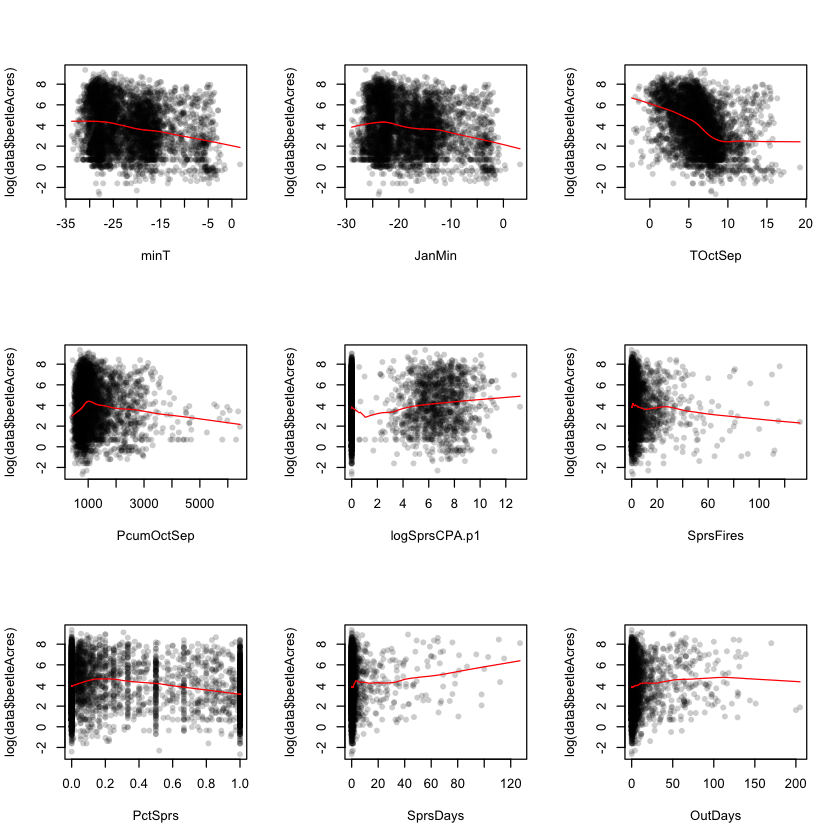

In [104]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [106]:
for (field in names(data)) {
  if (field != 'beetleAcres') {
    cat(sprintf('%s + ', field))
  }
}

lon + lat + etopo1 + host + forest + mStdAge + density + PctLarge + PctOld + vcc + mfri + prs + pms + pls + GAP1 + GAP2 + GAP3 + vpd + cwd + maxAugT + summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugMaxT + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + JanTmin + PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + maxT + Tmin + winterMin + summerTmean + Pmean + summerP1 + minT + JanMin + TOctSep + Jan20 + PcumOctSep + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays + 

In [136]:
range(data$vpd)
#exp(data$ddAugJul)

[1]  58720.63 414196.15

In [155]:
mod <- lm(
  log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 
    + I(etopo1^2) + host + forest + mStdAge + I(mStdAge^2) + density 
    + I(density^2) + PctLarge + I(PctLarge^2) + PctOld + vcc + log(vcc + 1)
    + mfri + log(mfri) + prs + I(prs^2) + pms + pls + GAP1 + GAP2 + GAP3 
    + vpd + I(vpd^2) + cwd + maxAugT + I(maxAugT^2) + summerP0 
    + I(summerP0^2) + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar 
    + I(Tvar^2) + wd + I(wd^2) + AugTmean + OctTmin + exp(OctTmin) 
    + AugMaxT + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + MarMin + ddAugJun
    + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) + summerP2 
    + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) 
    + fallTmean + exp(fallTmean) + MarTmin + maxT + I(maxT^2) + Tmin 
    + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 
    + I(summerP1^2) + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep)
    + Jan20 + PcumOctSep + I(PcumOctSep^2) + logSprsCPA.p1 
    + I(logSprsCPA.p1^2) + SprsFires + PctSprs + I(PctSprs^2) + SprsAcre 
    + SprsDays + OutDays + log(OutDays + 1),
  data=data)

In [156]:
mod.r <- step(mod, trace=0)

In [157]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + host + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + PctLarge + I(PctLarge^2) + PctOld + vcc + 
    log(vcc + 1) + prs + I(prs^2) + GAP1 + GAP3 + vpd + I(vpd^2) + 
    cwd + I(maxAugT^2) + summerP0 + I(summerP0^2) + Tmean + I(Tmean^2) + 
    exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + 
    OctTmin + exp(OctTmin) + AugMaxT + AugTmax + ddAugJun + ddAugJul + 
    I(ddAugJul^2) + PPT + I(PPT^2) + summerP2 + I(summerP2^2) + 
    TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + 
    exp(fallTmean) + MarTmin + maxT + Tmin + winterMin + summerTmean + 
    Pmean + I(Pmean^2) + I(summerP1^2) + minT + I(JanMin^2) + 
    TOctSep + exp(TOctSep) + Jan20 + PcumOctSep + I(PcumOctSep^2) + 
    logSprsCPA.p1 + I(logSprsCPA.p1^2) + SprsFires + PctSprs + 
    I(PctSprs^2) + SprsAcre + log(OutDays + 1), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”

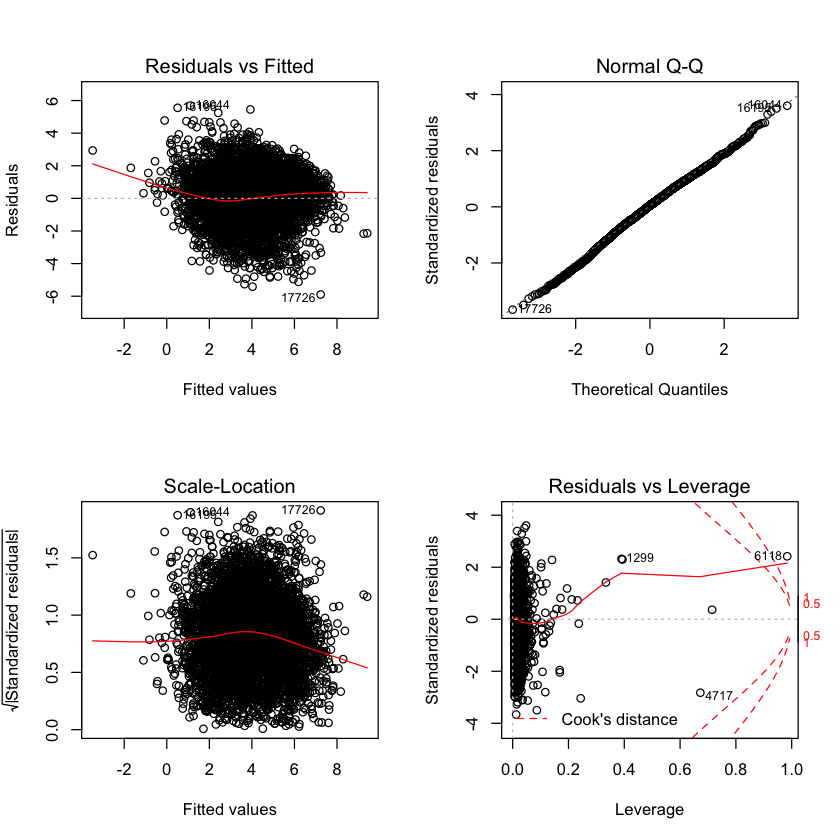

In [159]:
par(mfrow=c(2, 2))
plot(mod.r)

In [160]:
which(rownames(data) == 6118)
data[1404, ]

[1] 1404

lon      lat      etopo1   beetleAcres host forest mStdAge density 
6118 -116.588 33.82298 898.0144 0.935       1    0      0       3762.643
     PctLarge PctOld ⋯ TOctSep  Jan20 PcumOctSep logSprsCPA.p1 SprsFires
6118 0        0      ⋯ 19.23824 0     457.6037   9.028139      1        
     PctSprs   SprsAcre SprsDays OutDays preds     
6118 0.1111111 0.5      1        1       -0.5654257

In [162]:
mod2 <- update(mod, . ~ ., data=data[-1404, ])
mod2.r <- step(mod2, trace=0)

In [163]:
summary(mod2.r)


Call:
lm(formula = log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + host + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + PctLarge + I(PctLarge^2) + PctOld + vcc + 
    log(vcc + 1) + prs + I(prs^2) + GAP1 + GAP3 + vpd + I(vpd^2) + 
    cwd + I(maxAugT^2) + summerP0 + I(summerP0^2) + Tmean + I(Tmean^2) + 
    exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + 
    OctTmin + exp(OctTmin) + AugMaxT + AugTmax + ddAugJun + ddAugJul + 
    I(ddAugJul^2) + PPT + I(PPT^2) + summerP2 + I(summerP2^2) + 
    TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + 
    exp(fallTmean) + MarTmin + maxT + Tmin + winterMin + summerTmean + 
    Pmean + I(Pmean^2) + I(summerP1^2) + minT + I(JanMin^2) + 
    TOctSep + exp(TOctSep) + Jan20 + PcumOctSep + I(PcumOctSep^2) + 
    logSprsCPA.p1 + I(logSprsCPA.p1^2) + SprsFires + PctSprs + 
    I(PctSprs^2) + SprsAcre + log(OutDays + 1), data = data[-1404, 
    ])

Residuals:
    Min      1Q  Median   

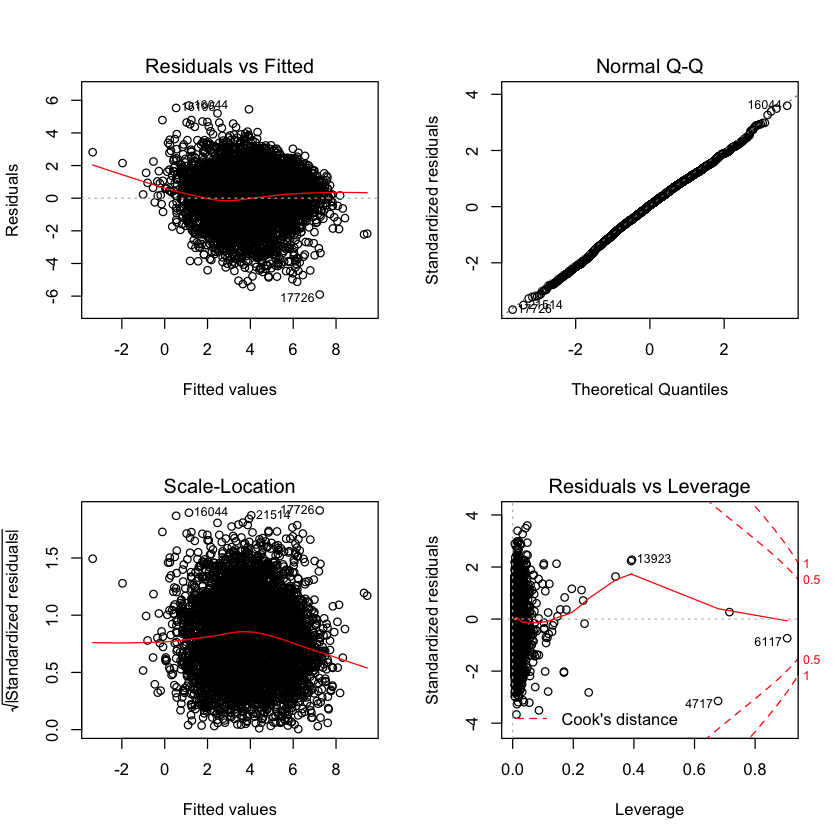

In [164]:
par(mfrow=c(2, 2))
plot(mod2.r)

In [167]:
data <- data[-1404, ]

In [168]:
data$preds <- mod2.r$fitted

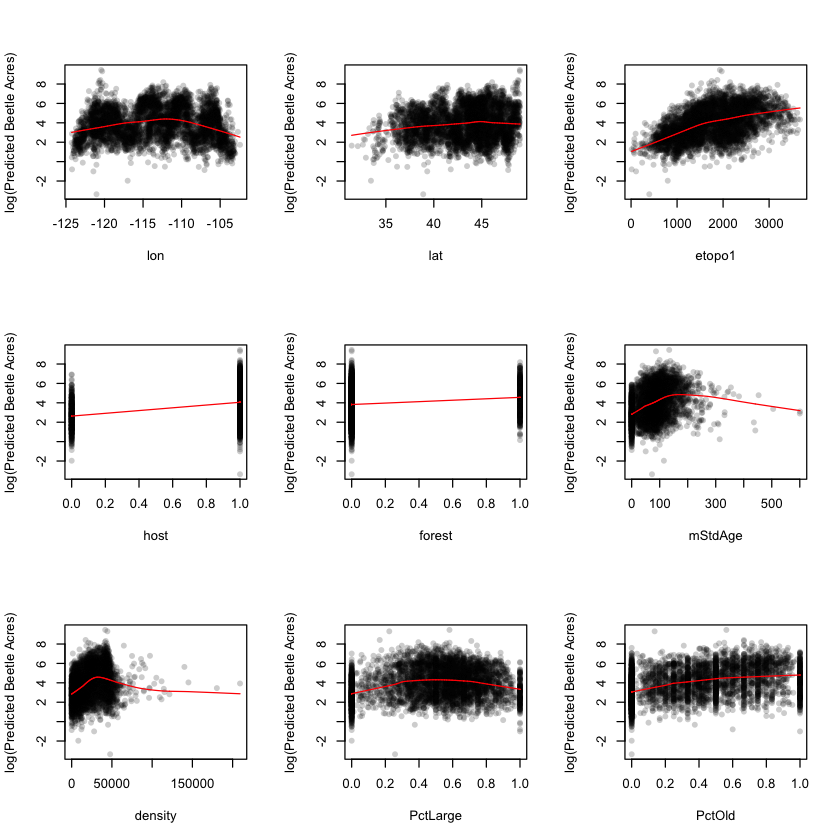

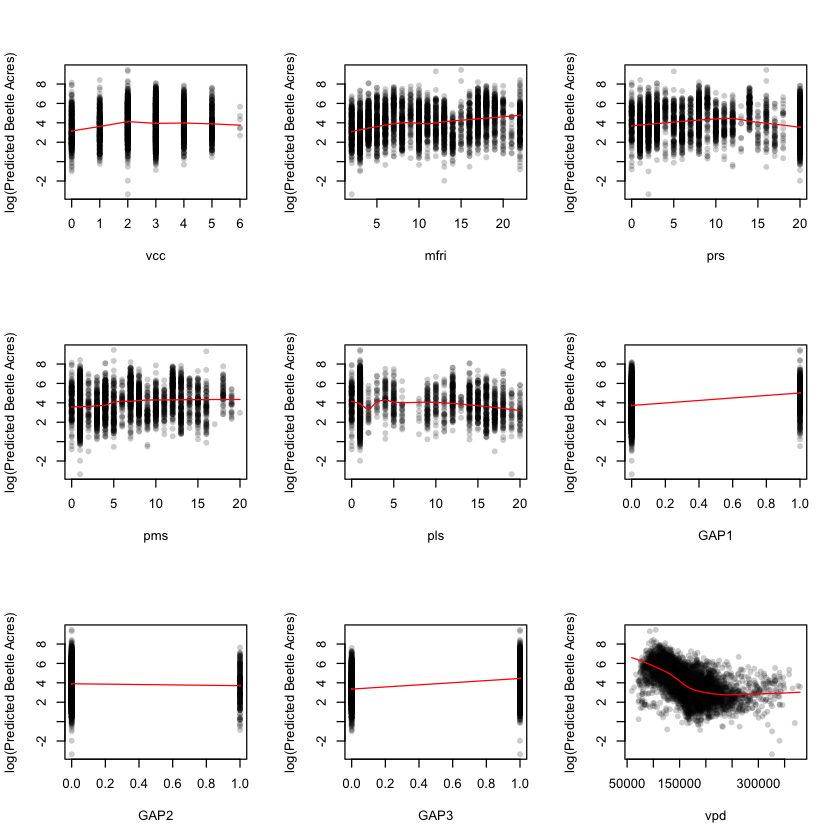

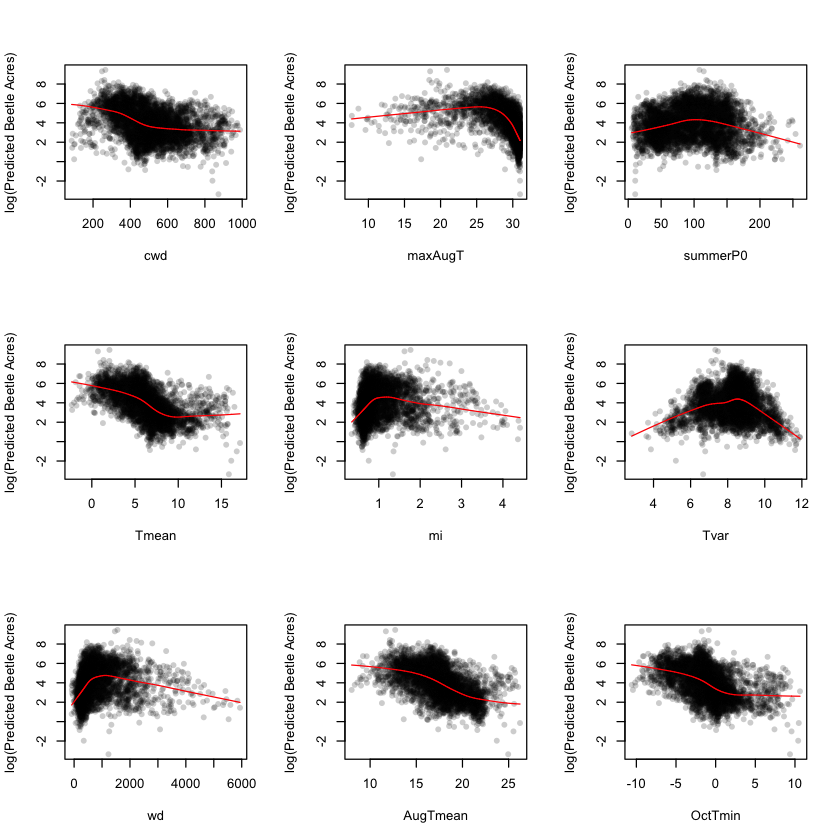

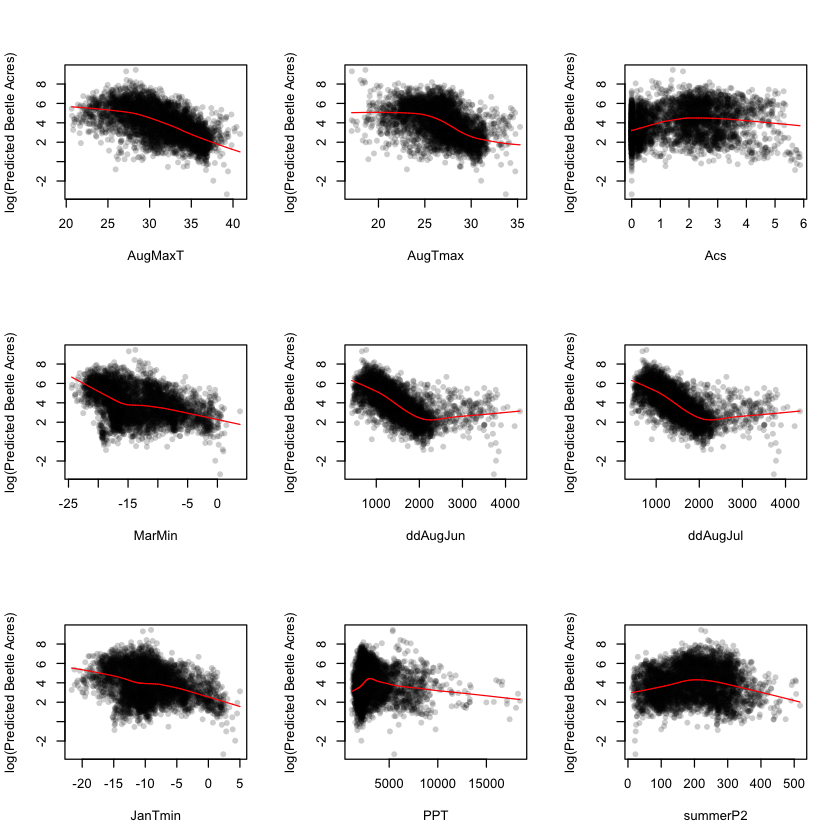

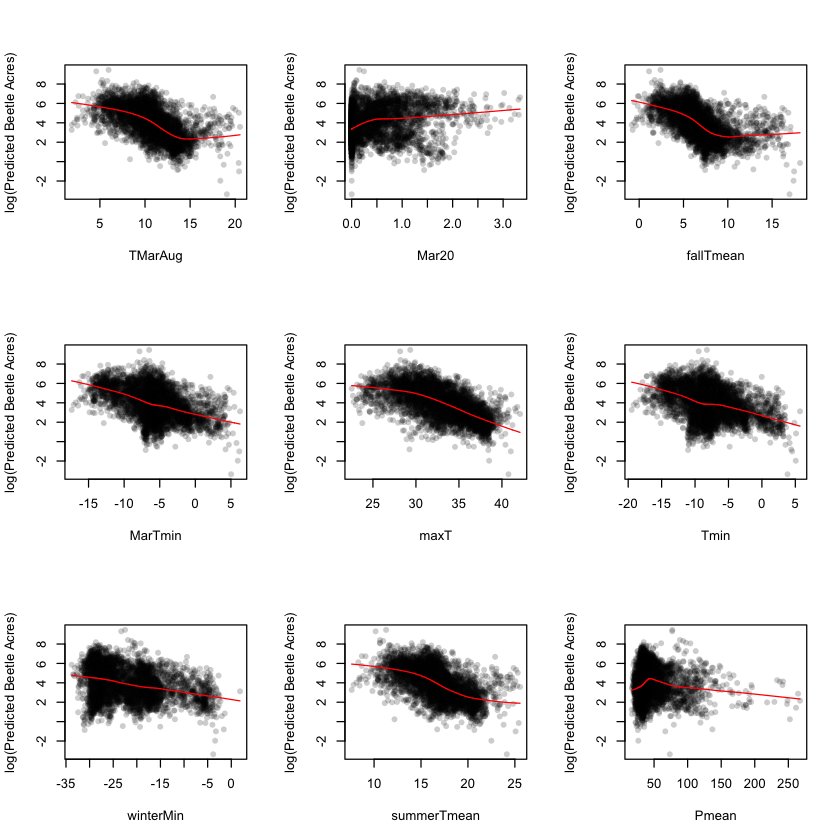

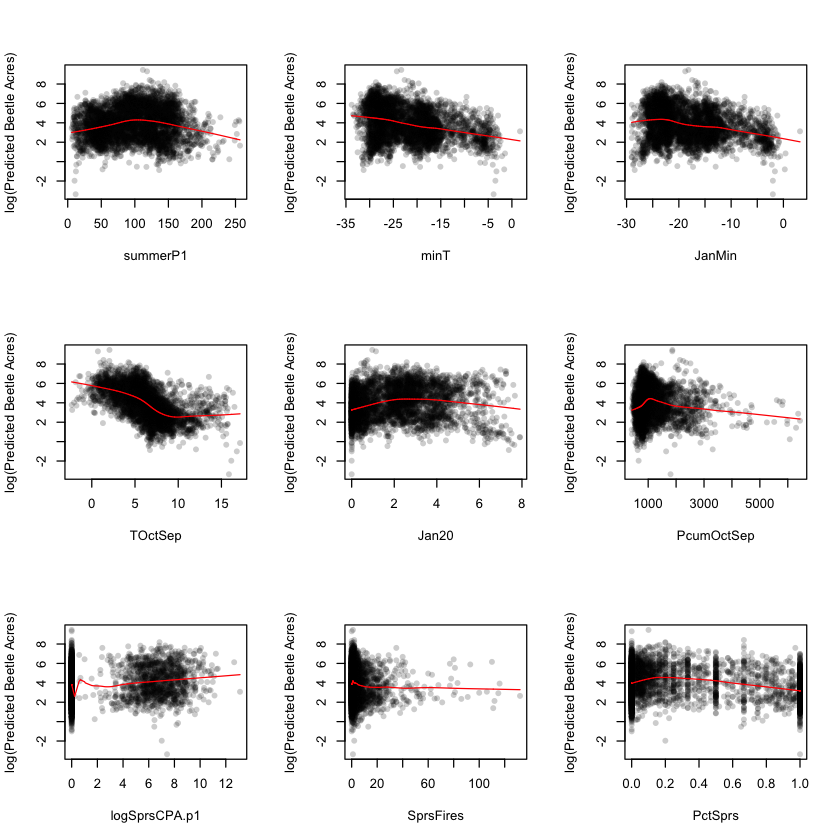

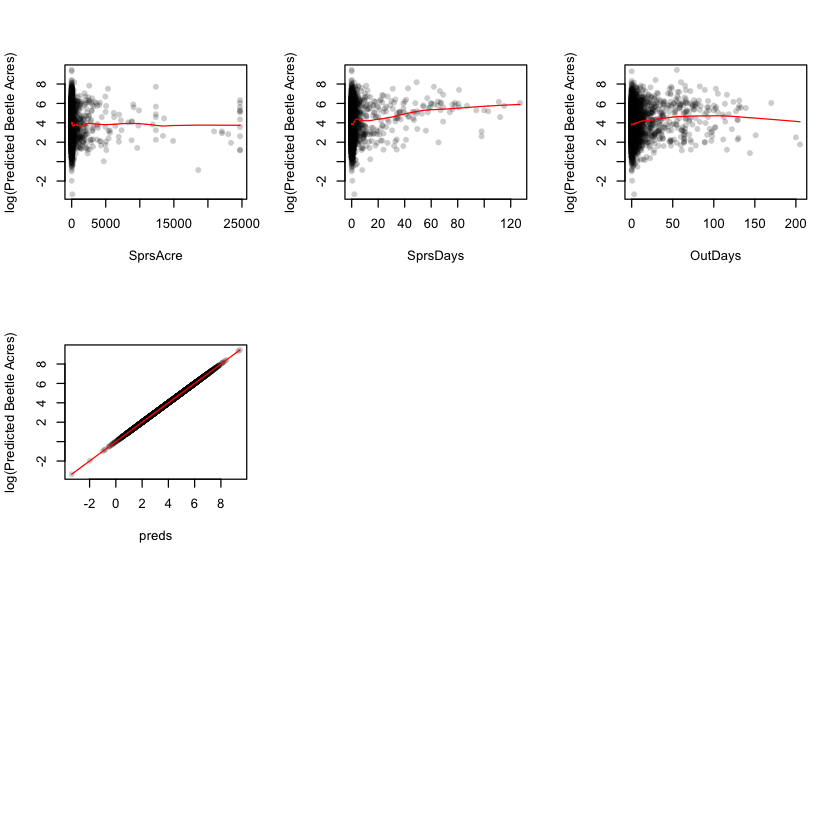

In [169]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (field != 'beetleAcres') {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [190]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

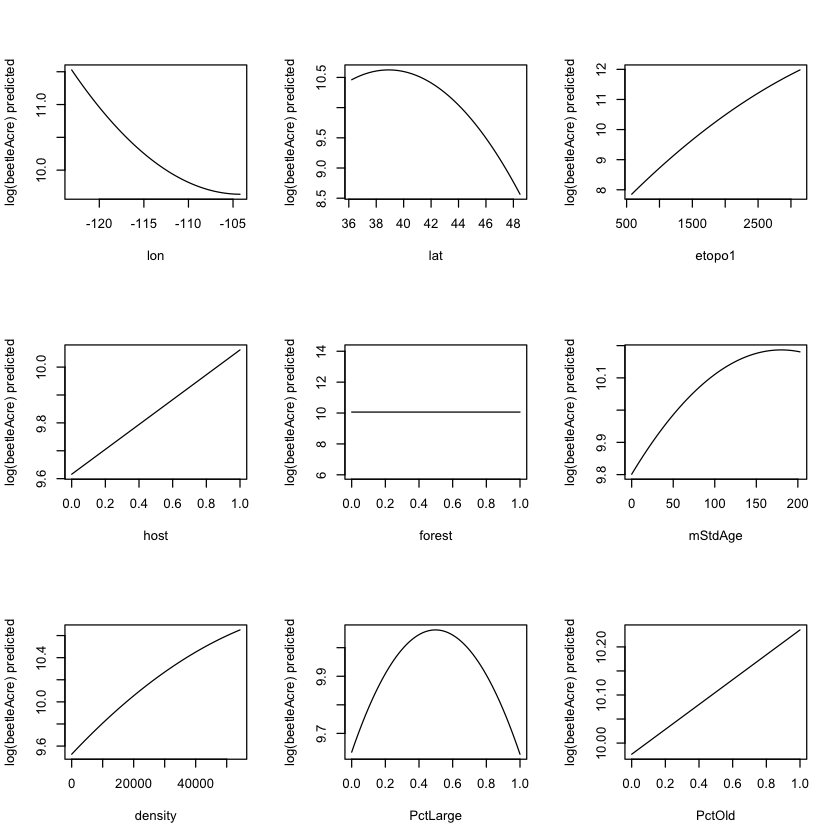

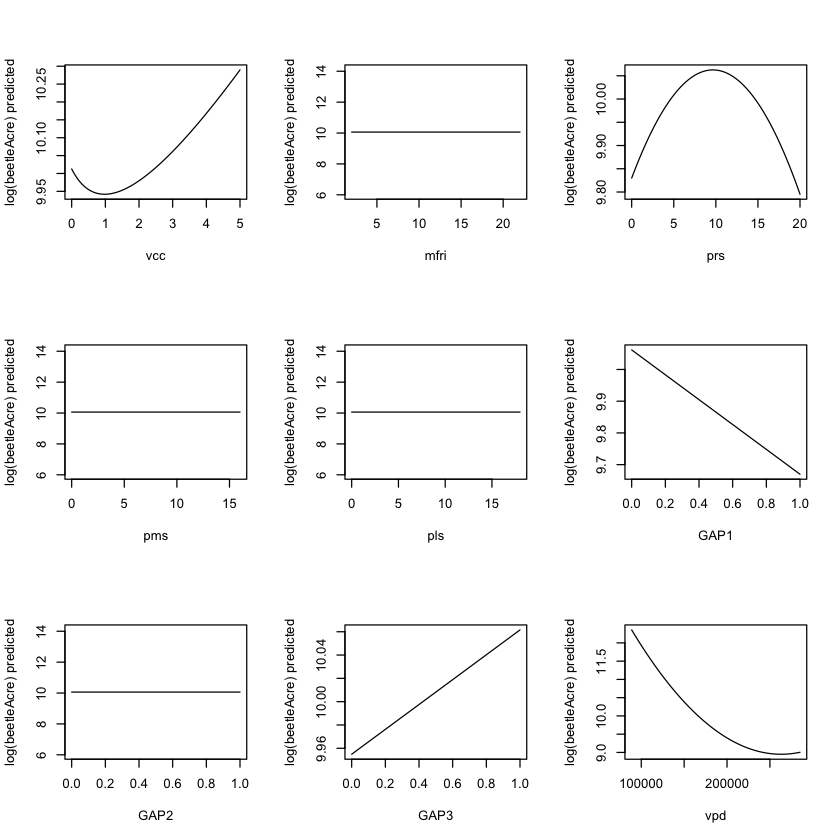

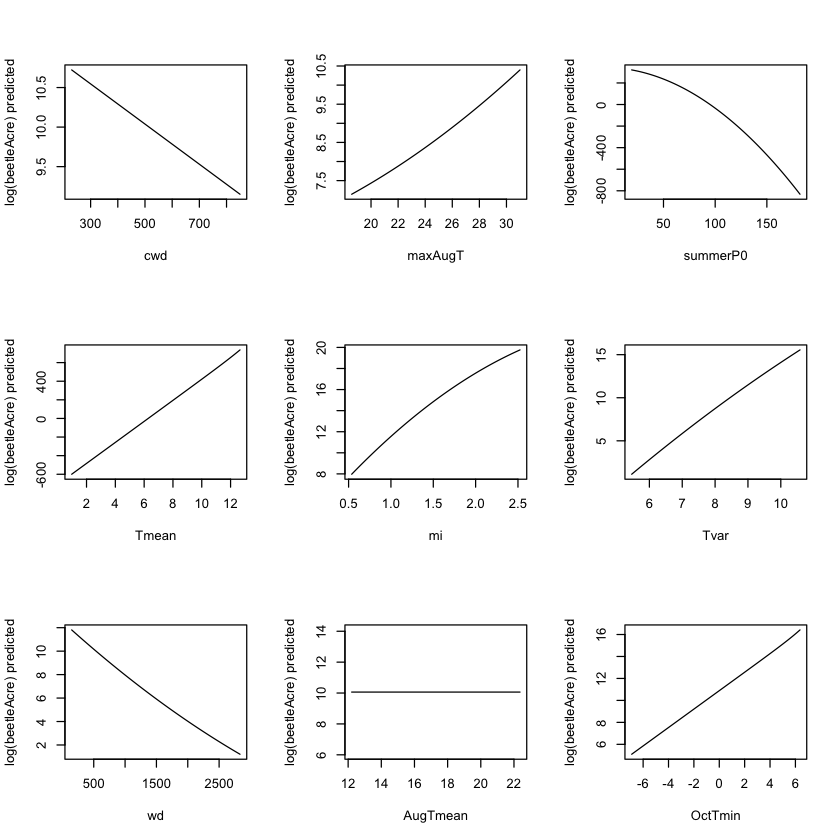

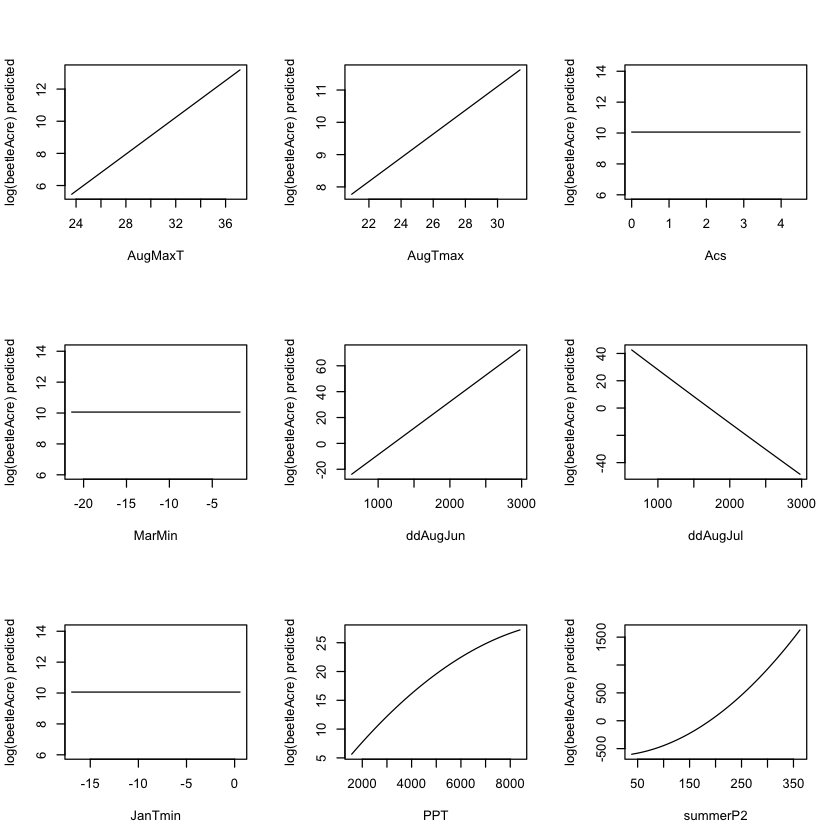

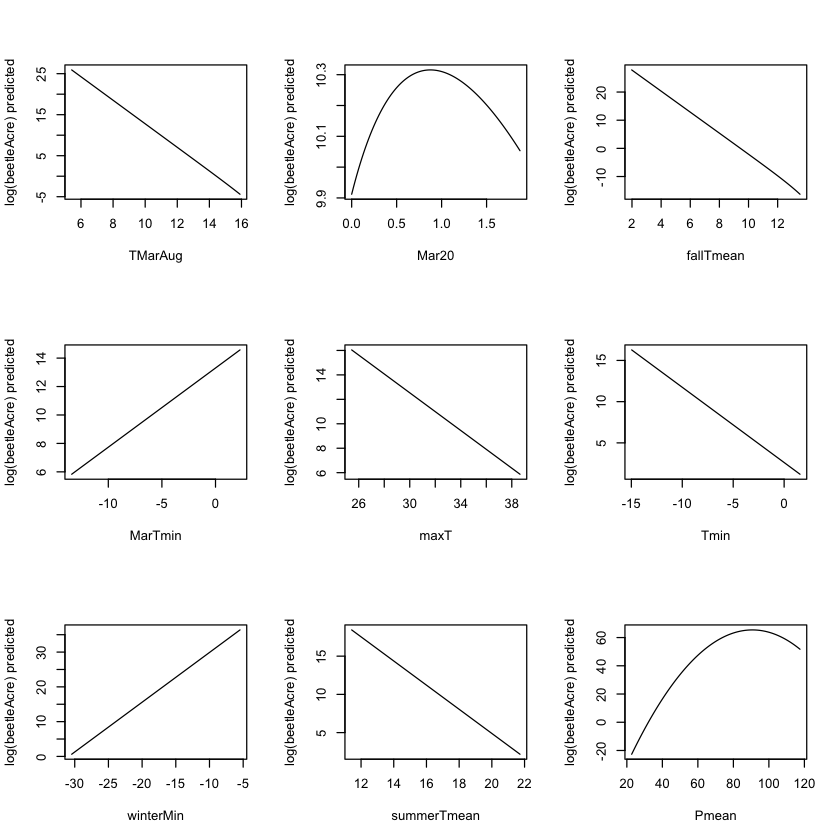

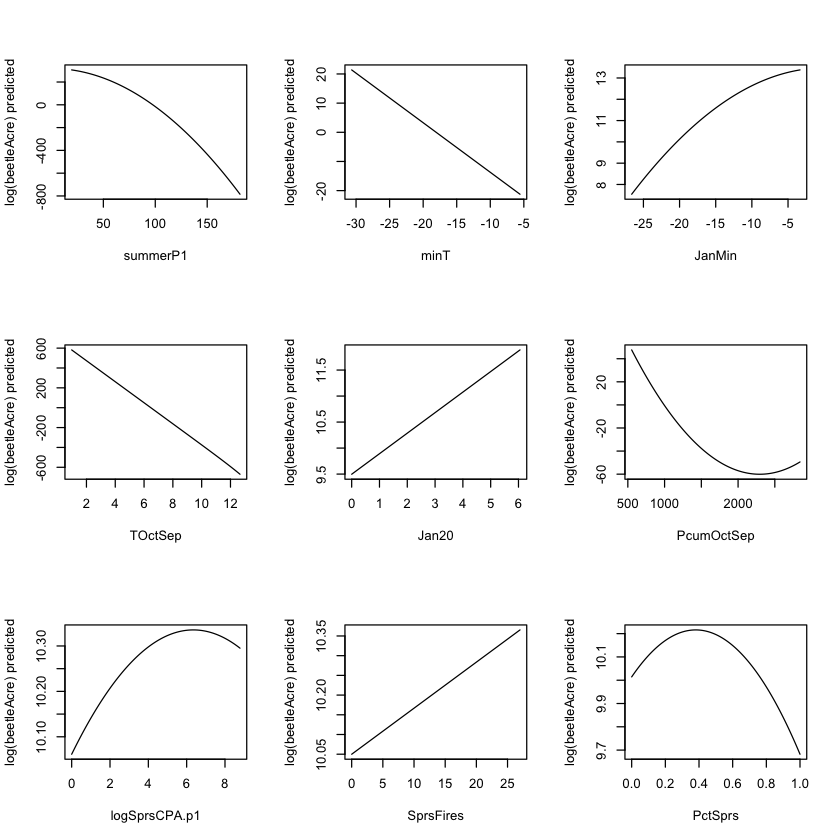

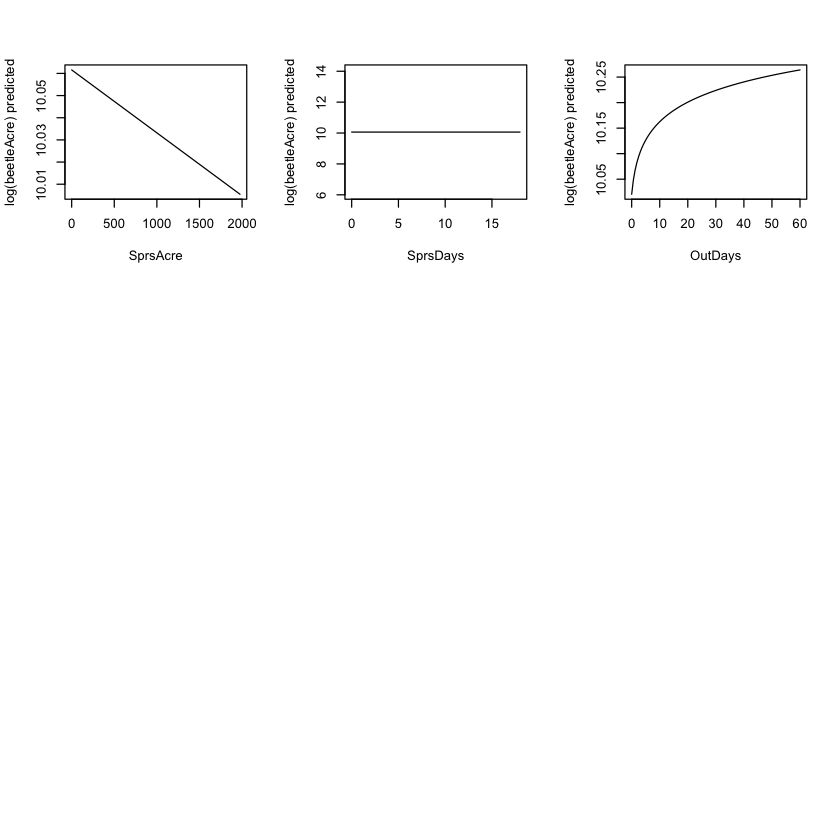

In [196]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod2.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

In [195]:
range(data$beetleAcres) # max ~ 1.2e4

[1]     0.07 11862.80

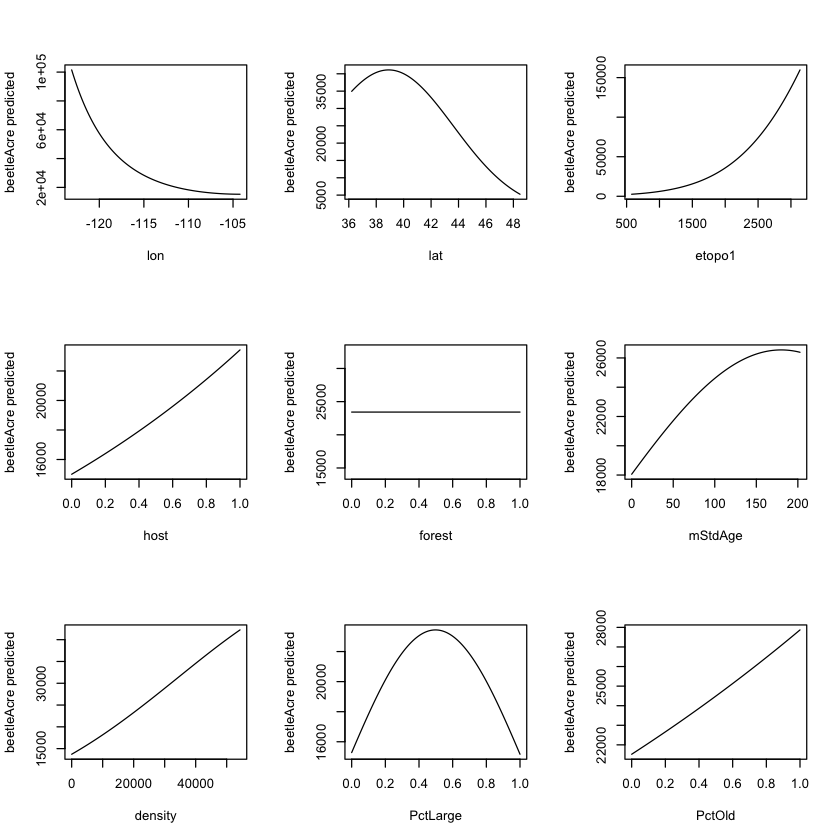

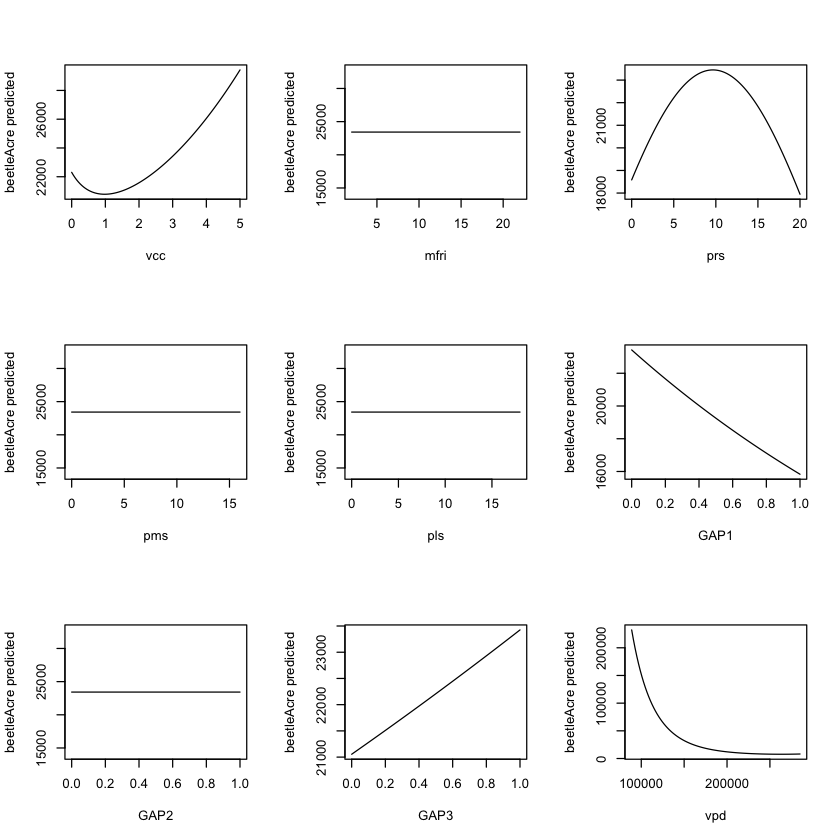

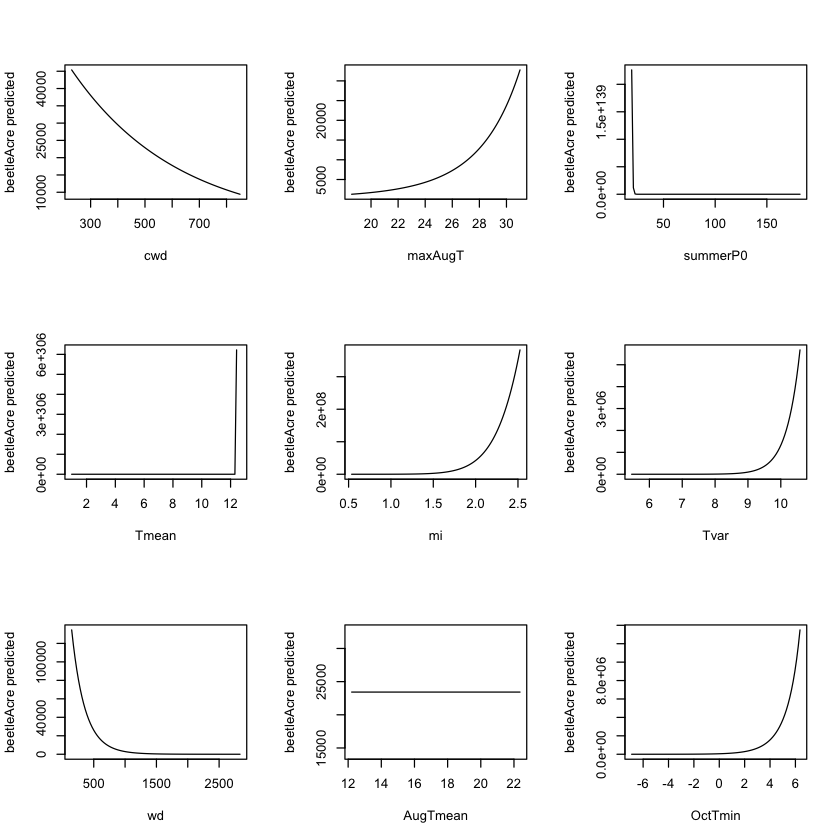

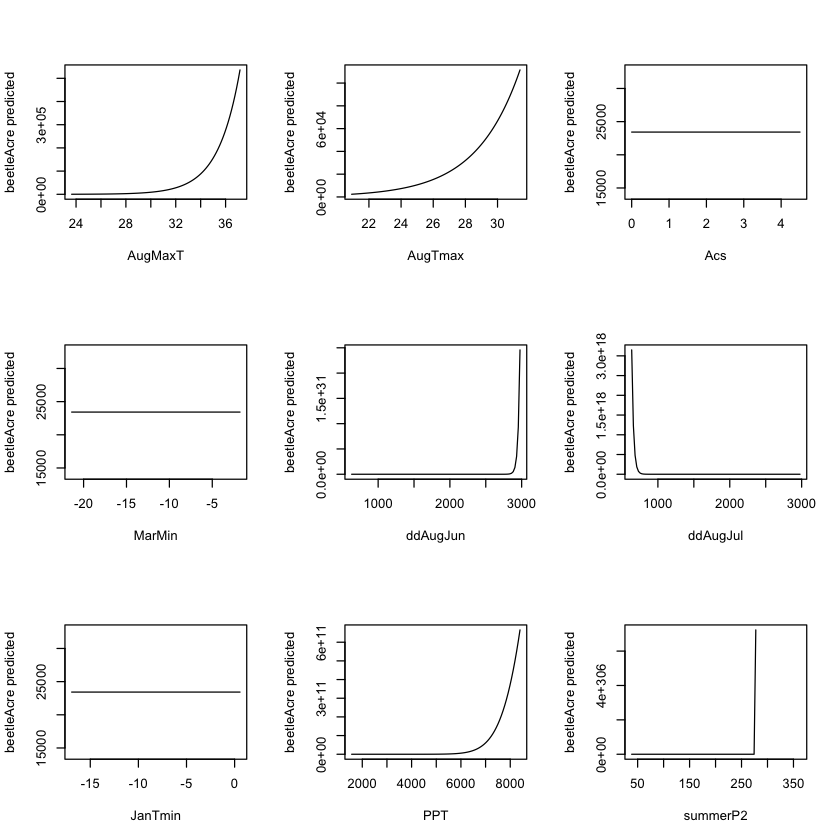

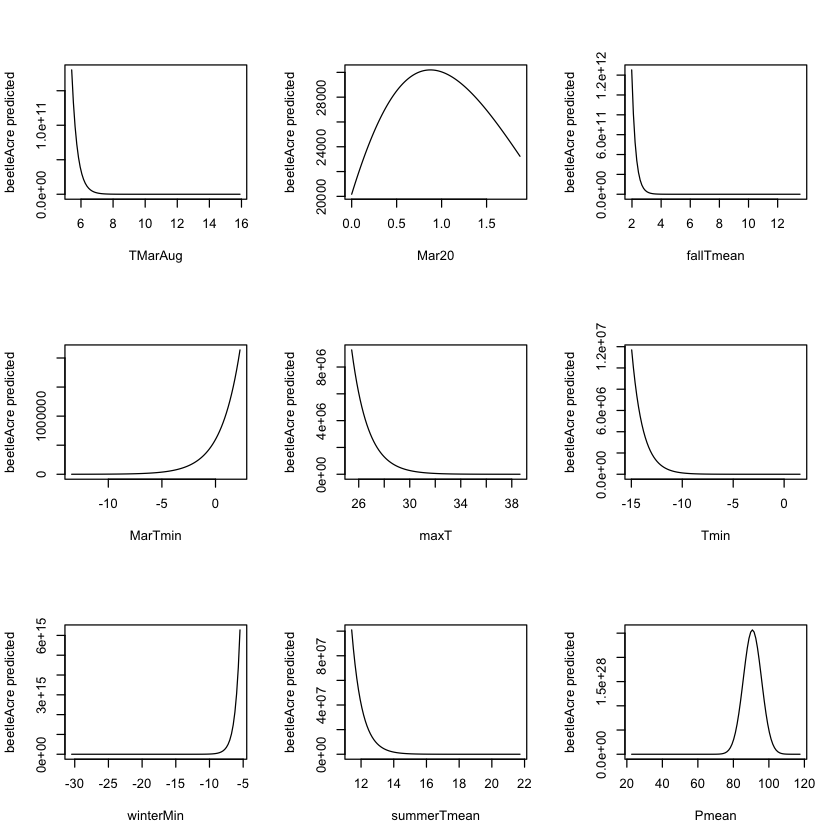

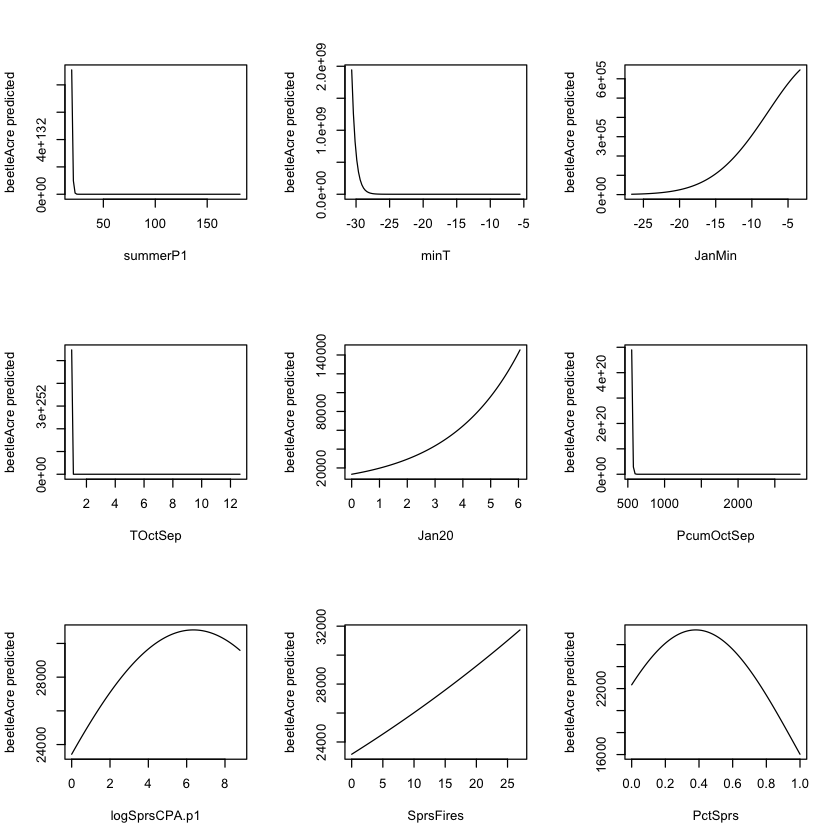

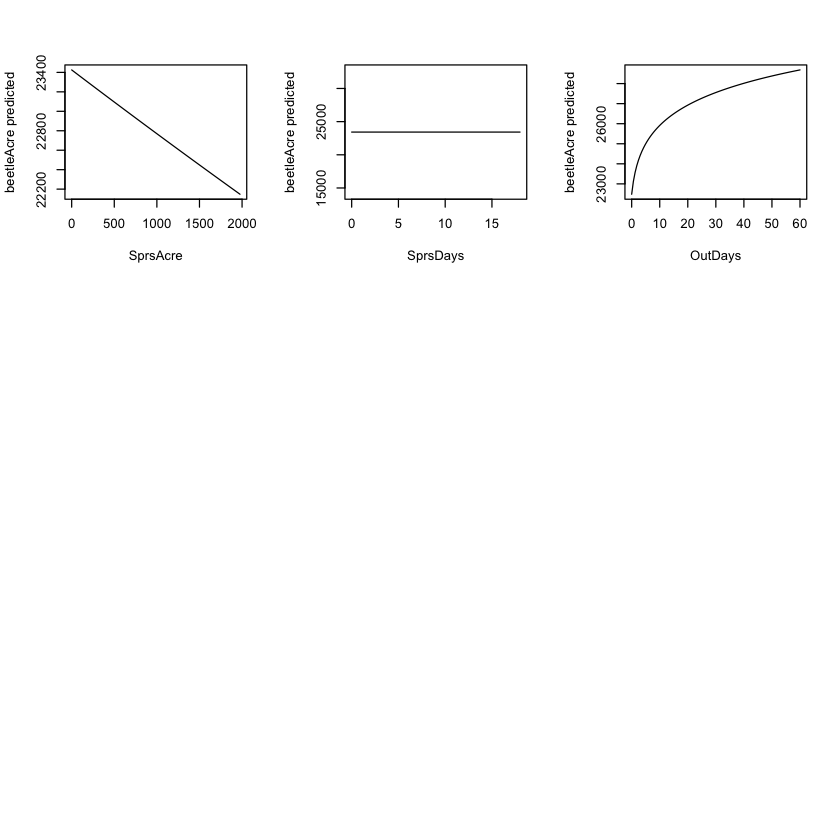

In [197]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod2.r, newdata=test.df))
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}